<a href="https://colab.research.google.com/github/Dima-salang/ai-ml-dl/blob/main/LinReg_TestScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Test Scores using Linear Regression



In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras

In [2]:


# Load data
test_scores_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/test_scores.csv').dropna()


# Define feature and label columns
feature_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']
label_columns = ['MathScore', 'ReadingScore', 'WritingScore']

# Extract features and labels
test_scores_features = test_scores_csv[feature_columns]
test_scores_labels = test_scores_csv[label_columns]

# Define transformers
categorical_features = ['Gender', 'EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'IsFirstChild', 'WklyStudyHours', 'TransportMeans']
numeric_features = ['NrSiblings']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('numeric', StandardScaler(), numeric_features),
    ],
    remainder='passthrough'
)

scaler = StandardScaler()
test_scores_labels = scaler.fit_transform(test_scores_labels)



test_scores_features = preprocessor.fit_transform(test_scores_features)
test_scores_features = np.array(test_scores_features)
test_scores_labels = np.array(test_scores_labels)
print(test_scores_features)
print(test_scores_labels)



model = Ridge(alpha=10.0)

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(test_scores_features, test_scores_labels, test_size=0.2)

alphas = [0.1, 1.0, 5.0, 10.0, 12.0, 50.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
print("Best alpha:", best_alpha)

print(test_scores_features.shape)
print(test_scores_labels.shape)
# Fit the model using the pipeline

model.fit(X_train, y_train)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, test_scores_features, test_scores_labels, cv=cv, scoring='r2')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

# Evaluate the model
score = model.score(X_test, y_test)
print(score)

prediction = model.predict(X_test)
print(scaler.inverse_transform(prediction))
print("True labels: ", scaler.inverse_transform(y_test))

mse = mean_squared_error(y_test, prediction)
print("MSE: ", mse)



[[ 0.          1.          0.         ...  0.          1.
   1.28317615]
 [ 1.          0.          1.         ...  0.          1.
  -1.48748797]
 [ 0.          1.          0.         ...  0.          1.
  -0.79482194]
 ...
 [ 1.          0.          0.         ...  0.          0.
  -0.79482194]
 [ 0.          0.          0.         ...  0.          1.
   0.59051012]
 [ 1.          1.          0.         ...  0.          1.
  -0.79482194]]
[[ 1.32564419  1.58710968  1.4467102 ]
 [ 0.60958984  0.57257912  0.41321342]
 [ 0.41430229  0.97839135  0.67158762]
 ...
 [-0.56213546 -1.11830514 -1.13703175]
 [ 1.00016494  1.38420357  1.5758973 ]
 [-0.17156036 -0.64485755 -0.68487691]]
Best alpha: 10.0
(19243, 19)
(19243, 3)
Cross-Validation Scores: [0.19700434 0.19169534 0.1962851  0.22170725 0.18010265]
Mean R-squared: 0.1973589317017574
0.19748655858114647
[[64.63271707 74.99786841 76.39058077]
 [66.78754259 62.42174346 59.701565  ]
 [61.93525138 71.88160589 71.65565908]
 ...
 [60.32911514 68.

# Using a Decision Tree Regressor


In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
regressor_model = DecisionTreeRegressor()
regressor_model.fit(X_train, y_train)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, test_scores_features, test_scores_labels, cv=cv, scoring='r2')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

# Evaluate the model
score = regressor_model.score(X_test, y_test)
print(score)

prediction = regressor_model.predict(X_test)
print(scaler.inverse_transform(prediction))
print("True labels: ", scaler.inverse_transform(y_test))

mse = mean_squared_error(y_test, prediction)
print("MSE: ", mse)


Cross-Validation Scores: [0.19700434 0.19169534 0.1962851  0.22170725 0.18010265]
Mean R-squared: 0.1973589317017574
-0.4168179771969606
[[41.  48.  48. ]
 [56.  47.5 47.5]
 [47.  59.  54. ]
 ...
 [74.  72.  68. ]
 [83.  89.  94. ]
 [64.  64.  66. ]]
True labels:  [[67. 70. 78.]
 [37. 37. 29.]
 [82. 90. 96.]
 ...
 [74. 76. 77.]
 [71. 86. 78.]
 [79. 82. 81.]]
MSE:  1.391528624929185


# Predicting Ad Clicks Using Logistic Regression


In [5]:
from sklearn.linear_model import LogisticRegression


pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Social_Network_Ads.csv')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
demographics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Social_Network_Ads.csv')

demographics_features = demographics[['Gender', 'Age', 'EstimatedSalary']]
demographics_labels = demographics['Purchased']

categorical_features = ['Gender']
numerical_features = ['Age', 'EstimatedSalary']

log_reg_preprocessor = ColumnTransformer (
    transformers=[
        ('categorical', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('numerical', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

demographics_features = log_reg_preprocessor.fit_transform(demographics_features)
print(demographics_features)
demographics_features = np.array(demographics_features)
demographics_labels = np.array(demographics_labels)



log_reg_model = LogisticRegression()

log_reg_pipeline = Pipeline([
    ('preprocessor', log_reg_preprocessor),
    ('model', log_reg_model)
])



X_train, X_test, y_train, y_test = train_test_split(demographics_features, demographics_labels, test_size=0.2)
print(y_test.ndim)

log_reg_model.fit(X_train, y_train)
predictions = log_reg_model.predict(X_test)
print("Predictions: ", predictions)
print("True labels: ", y_test)
score = log_reg_model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("Score: ", score)


pd.DataFrame(predictions)
pd.DataFrame(y_test)

[[ 1.         -1.78179743 -1.49004624]
 [ 1.         -0.25358736 -1.46068138]
 [ 0.         -1.11320552 -0.78528968]
 ...
 [ 0.          1.17910958 -1.46068138]
 [ 1.         -0.15807423 -1.07893824]
 [ 0.          1.08359645 -0.99084367]]
1
Predictions:  [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 0]
True labels:  [0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 0]
MSE:  0.1375
Score:  0.8625


,0
0,0
1,1
2,0
3,1
4,0
...,...
75,0
76,1
77,0
78,0




## Decision Trees: In-Depth Understanding

### Core Concept
Decision trees are tree-like structures used for both classification and regression tasks. In the context of classification, each leaf node represents a class, and the journey from the root to a leaf node follows a set of conditions based on input features.

### Binary Tree Structure
- **Nodes:**
  - **Decision Nodes:** Contain conditions for splitting data.
  - **Leaf Nodes:** Represent the final class for a set of conditions.

- **Splitting:**
  - At each decision node, the dataset is split into subsets based on a specific feature and a threshold.

### Training Process
1. **Root Node:**
   - Initially encompasses the entire dataset.
   
2. **Splitting:**
   - Conditions are applied at decision nodes, leading to recursive splitting until pure leaf nodes are achieved.
   
3. **Leaf Nodes:**
   - Contain data of only one class, signifying a point of classification.

### Classification Process
- **Traversal:**
  - New data points traverse the tree, following conditions until reaching a leaf node.
  
- **Leaf Node Classification:**
  - Majority voting may be applied in impure leaf nodes to determine the final classification.

### Information Gain
- **Objective:**
  - Maximize information gain at each split.
  
- **Entropy:**
  - Measure of uncertainty; higher entropy signifies more uncertainty.

- **Information Gain Calculation:**
  - Compares entropy of parent node with the combined entropy of child nodes.

### Greedy Algorithm
- **Decision Making:**
  - Greedy approach: Locally optimal decisions at each node without backtracking.
  
- **Speed and Effectiveness:**
  - Accelerates training, despite potential suboptimal global solutions.

### Final Model
- **Decreasing Impurity:**
  - Notice how at every level, the impurity of states (measured by entropy) decreases, leading to a refined and effective model.

### Conclusion
Decision trees, with their intuitive structure and powerful classification capabilities, stand out as versatile tools in machine learning. Stay tuned for the next video, where we'll explore the practical side by coding a decision tree from scratch. Happy learning!

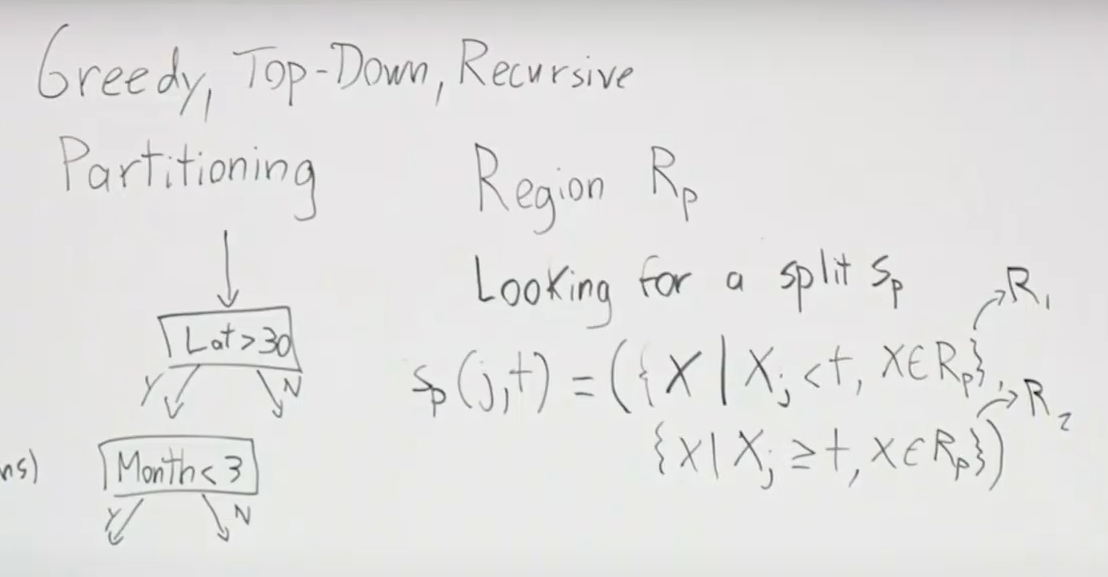

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Predictions:  [0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 0 1 1 0 0]
True labels:  [0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 0]
MSE:  0.1875
Score:  0.8125


,0
0,0
1,1
2,0
3,1
4,0
...,...
75,0
76,1
77,0
78,0


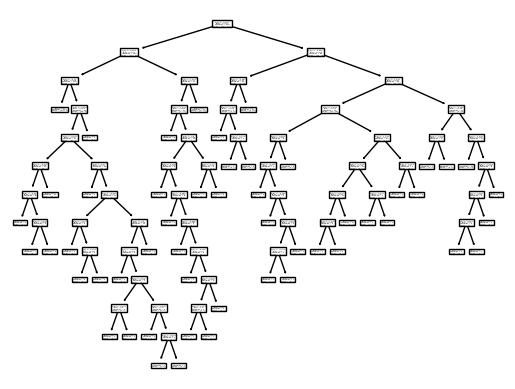

In [8]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

predictions = decision_tree_model.predict(X_test)
print("Predictions: ", predictions)
print("True labels: ", y_test)

score = decision_tree_model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("Score: ", score)

plot_tree(decision_tree_model)


pd.DataFrame(predictions)
pd.DataFrame(y_test)

# Naive Bayes


In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

predictions = gaussianNB.predict(X_test)
print("Predictions: ", predictions)
print("True labels: ", y_test)

score = gaussianNB.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("Score: ", score)



pd.DataFrame(predictions)
pd.DataFrame(y_test)

Predictions:  [0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 0]
True labels:  [0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 0]
MSE:  0.075
Score:  0.925


,0
0,0
1,1
2,0
3,1
4,0
...,...
75,0
76,1
77,0
78,0
